In [12]:
# idea:

# training should create a json file with the following structure, a list of dict with the following keys:
# - loss
# - accuracy + other metrics
# - degrad loss
# - # samples seen
# eg. [{loss: 0.1, accuracy: 0.9, degrad_loss: 0.2, samples_seen: 1000}, {loss: 0.2, accuracy: 0.8, degrad_loss: 0.3, samples_seen: 2000}]


# Then we create a final test json with following keys:
# - one key per metric

# Ideally, create a folder regrouping all the relevent traning logs

# color code: grey and yellow (grey for base, yellow for modified), maybe ask again in case

# Test everything locally first

In [2]:
import json
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import jsonlines

# 0) Loading data

In [39]:
#roberta_training_base = "./saved_training_logs/output_freeze_model/roberta/"
roberta_training_base = "./outputs_full_finetuning/roberta/"
#roberta_full_finetnuning_training_base = "./outputs_full_finetuning/roberta_large/"
#roberta_freeze_base_training_base = "./outputs_freeze_base/roberta_large/"


training_logs= roberta_training_base + "25_03_1240/training_logs.json"

#training_logs = roberta_freeze_base_training_base + "26_03_1601/training_logs.json"

In [40]:
training_logs_data = []
for line in jsonlines.open(training_logs):
    training_logs_data.append(line)

# transform to pandas dataframe
df = pd.DataFrame(training_logs_data)
df.head(100)

,samples,accuracy,std,lower_bound,upper_bound,loss,degrad_loss
0,98,0.51804,0.050493,0.42000,0.62,NaN,NaN
1,198,0.51768,0.048237,0.42000,0.61,NaN,NaN
2,298,0.51860,0.048273,0.42975,0.62,NaN,NaN
3,398,0.74078,0.044107,0.64000,0.82,NaN,NaN
4,498,0.94989,0.021897,0.90000,0.99,NaN,NaN
5,598,0.99024,0.010007,0.97000,1.00,NaN,NaN
6,698,0.98035,0.014553,0.95000,1.00,NaN,NaN
7,798,0.93859,0.023915,0.89000,0.98,NaN,NaN
8,898,0.97968,0.014160,0.95000,1.00,NaN,NaN
9,998,0.98023,0.013321,0.95000,1.00,NaN,NaN


In [49]:
# separate the data for the 3 different plots
# 1) data with accuracy != nan is eval_acc data
# 2) data with degrad_loss != nan is degrad_loss data
# 3) data with loss != nan is training loss data

# 1) eval_acc data
eval_acc_df = df[df["accuracy"].notna()]
eval_acc_df = eval_acc_df[["accuracy", "samples", "std", "lower_bound", "upper_bound"]]
display(eval_acc_df)

# 2) degrad_loss data
degrad_loss_df = df[df["degrad_loss"].notna()]
degrad_loss_df = degrad_loss_df[["degrad_loss", "samples", "std"]]
display(degrad_loss_df)

# 3) training loss data
training_loss_df = df[df["loss"].notna()]
training_loss_df = training_loss_df[["loss", "samples"]]
display(training_loss_df)

,accuracy,samples,std,lower_bound,upper_bound
0,0.51804,98,0.050493,0.42000,0.62
1,0.51768,198,0.048237,0.42000,0.61
2,0.51860,298,0.048273,0.42975,0.62
3,0.74078,398,0.044107,0.64000,0.82
4,0.94989,498,0.021897,0.90000,0.99
5,0.99024,598,0.010007,0.97000,1.00
6,0.98035,698,0.014553,0.95000,1.00
7,0.93859,798,0.023915,0.89000,0.98
8,0.97968,898,0.014160,0.95000,1.00
9,0.98023,998,0.013321,0.95000,1.00


,degrad_loss,samples,std
15,5.811741,0,0.110818
16,5.867649,198,0.048042
17,6.454772,398,0.117016
18,8.143171,598,0.239855
19,7.945374,798,0.151081
20,8.404947,998,0.135997


,loss,samples
10,0.696628,198
11,0.655237,398
12,0.322211,598
13,0.080317,798
14,0.110664,998


# 1) Eval acc loss plot

Text(0.5, 1.0, 'Evaluation accuracy during training with standard deviation')

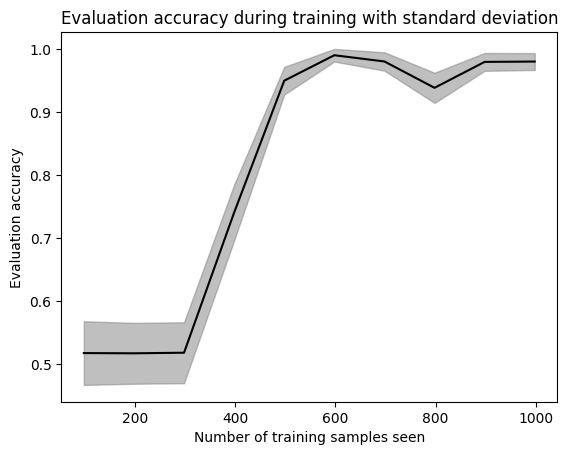

In [50]:
plt.fill_between(eval_acc_df["samples"], eval_acc_df["accuracy"] - eval_acc_df["std"],
                  eval_acc_df["accuracy"] + eval_acc_df["std"], alpha = 0.5, color = 'gray')
plt.plot(eval_acc_df["samples"], eval_acc_df["accuracy"], color = 'black')
# 
plt.xlabel('Number of training samples seen')
plt.ylabel('Evaluation accuracy')

plt.title('Evaluation accuracy during training with standard deviation')

Text(0.5, 1.0, 'Evaluation accuracy during training with confidence interval')

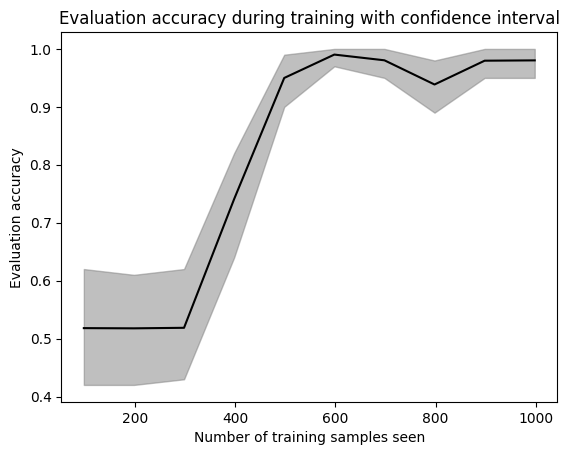

In [51]:
plt.fill_between(eval_acc_df["samples"], eval_acc_df["lower_bound"],
                  eval_acc_df["upper_bound"], alpha = 0.5, color = 'gray')
plt.plot(eval_acc_df["samples"], eval_acc_df["accuracy"], color = 'black')
# 
plt.xlabel('Number of training samples seen')
plt.ylabel('Evaluation accuracy')

plt.title('Evaluation accuracy during training with confidence interval')

# 2) Degradation loss plot

Text(0.5, 1.0, 'Degradation loss during training with standard deviation')

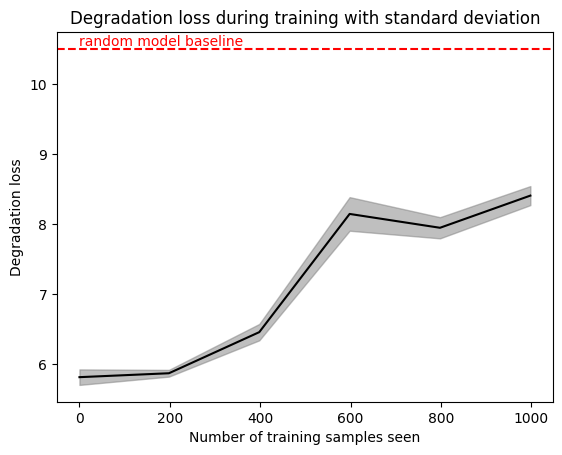

In [52]:
plt.fill_between(degrad_loss_df["samples"], degrad_loss_df["degrad_loss"] - degrad_loss_df["std"],
                  degrad_loss_df["degrad_loss"] + degrad_loss_df["std"], alpha = 0.5, color = 'gray')
plt.plot(degrad_loss_df["samples"], degrad_loss_df["degrad_loss"], color = 'black')

# add an horizontal line at 10.5, which is the baseline for a random model
plt.axhline(y=10.5, color='r', linestyle='--')

# name it "random model baseline"
plt.text(0, 10.55, "random model baseline", color = 'red')

plt.xlabel('Number of training samples seen')
plt.ylabel('Degradation loss')

plt.title('Degradation loss during training with standard deviation')

In [ ]:
# use instead:

plt.errorbar(stats_by_year.index, stats_by_year.average_worldwide_gross,
             yerr = stats_by_year.std_dev_worldwide_gross,
             capsize= 3)
plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue')

# 3) Training loss plot

Text(0.5, 1.0, 'Train loss during training')

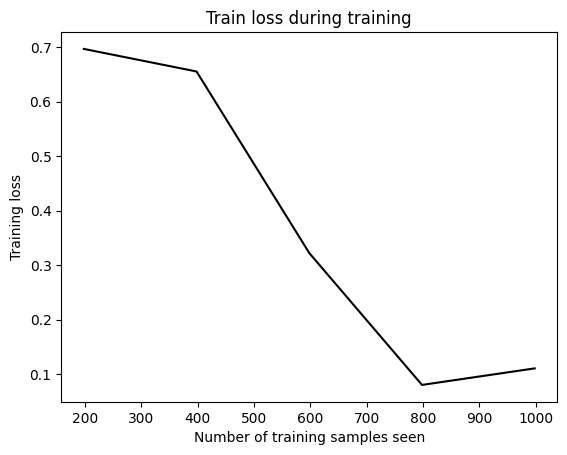

In [53]:
plt.plot(training_loss_df["samples"], training_loss_df["loss"], color = 'black')
# 
plt.xlabel('Number of training samples seen')
plt.ylabel('Training loss')

plt.title('Train loss during training')

# 4) Heatmap crossmodel plot

In [54]:
# detector trained on gpt-2 samples
detector_gpt2_results_path = "./outputs_freeze_base/roberta/25_03_1611/test/"

# detector trained on mistral samples
detector_mistral_results_path = "./outputs_full_finetuning/roberta/25_03_1240/test/"

dataset_gpt2 = "fake_true_dataset_gpt2_10k.json"
dataset_mistral = "fake_true_dataset_mistral_10k.json"

datasets = [dataset_gpt2, dataset_mistral]

# create a dataframe and load it with the results
# dataframe has column "detector", "dataset", "accuracy"

detector_gpt2_results = []
detector_mistral_results = []

# gpt2 results
for dataset in datasets:
    with open(detector_gpt2_results_path + "test_metrics_" + dataset, "r") as f:
        detector_gpt2_results.append(json.load(f))

# mistral results
for dataset in datasets:
    with open(detector_mistral_results_path + "test_metrics_" + dataset, "r") as f:
        detector_mistral_results.append(json.load(f))

# create a dataframe
detector_results_df = pd.DataFrame(columns = ["detector", "dataset", "accuracy", "precision", "recall", "f1_score", "std_accuracy", "std_precision", "std_recall", "std_f1_score"])

# fill the dataframe
detector_results_df.loc[0] = ["gpt2", "gpt2", detector_gpt2_results[0]["accuracy"], detector_gpt2_results[0]["precision"], detector_gpt2_results[0]["recall"], detector_gpt2_results[0]["f1_score"], detector_gpt2_results[0]["std_accuracy"], detector_gpt2_results[0]["std_precision"], detector_gpt2_results[0]["std_recall"], detector_gpt2_results[0]["std_f1_score"]]
detector_results_df.loc[1] = ["gpt2", "mistral", detector_gpt2_results[1]["accuracy"], detector_gpt2_results[1]["precision"], detector_gpt2_results[1]["recall"], detector_gpt2_results[1]["f1_score"], detector_gpt2_results[1]["std_accuracy"], detector_gpt2_results[1]["std_precision"], detector_gpt2_results[1]["std_recall"], detector_gpt2_results[1]["std_f1_score"]]
detector_results_df.loc[2] = ["mistral", "gpt2", detector_mistral_results[0]["accuracy"], detector_mistral_results[0]["precision"], detector_mistral_results[0]["recall"], detector_mistral_results[0]["f1_score"], detector_mistral_results[0]["std_accuracy"], detector_mistral_results[0]["std_precision"], detector_mistral_results[0]["std_recall"], detector_mistral_results[0]["std_f1_score"]]
detector_results_df.loc[3] = ["mistral", "mistral", detector_mistral_results[1]["accuracy"], detector_mistral_results[1]["precision"], detector_mistral_results[1]["recall"], detector_mistral_results[1]["f1_score"], detector_mistral_results[1]["std_accuracy"], detector_mistral_results[1]["std_precision"], detector_mistral_results[1]["std_recall"], detector_mistral_results[1]["std_f1_score"]]
display(detector_results_df)

,detector,dataset,accuracy,precision,recall,f1_score,std_accuracy,std_precision,std_recall,std_f1_score
0,gpt2,gpt2,0.882030,1.000000,0.764370,0.865161,0.031458,0.000000,0.059089,0.038551
1,gpt2,mistral,0.588653,0.550707,0.794100,0.650272,0.012089,0.014402,0.014599,0.012654
2,mistral,gpt2,0.706157,0.951790,0.434402,0.596380,0.010171,0.009813,0.015460,0.015039
3,mistral,mistral,0.978886,0.970344,0.986326,0.978256,0.003586,0.006060,0.004206,0.003728


Text(0.5, 1.0, 'Accuracy of RoBERTa detectors on the different datasets')

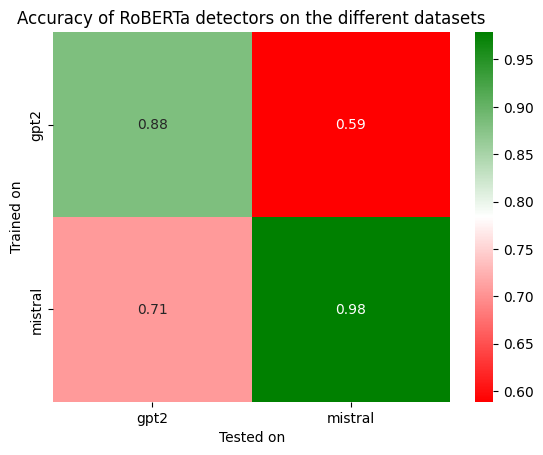

In [59]:
from  matplotlib.colors import LinearSegmentedColormap
cmap_g_r =LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

# 4x4 heatmap with the results where columns are the detectors trained on datasets and values are the accuracy
heatmap = sns.heatmap(detector_results_df.pivot(index="detector", columns="dataset", values="accuracy"), annot=True, cmap=cmap_g_r)
plt.xlabel("Tested on")
plt.ylabel("Trained on")

plt.title("Accuracy of RoBERTa detectors on the different datasets")

In [56]:
heatmap.texts[3].get_text()

'0.98'

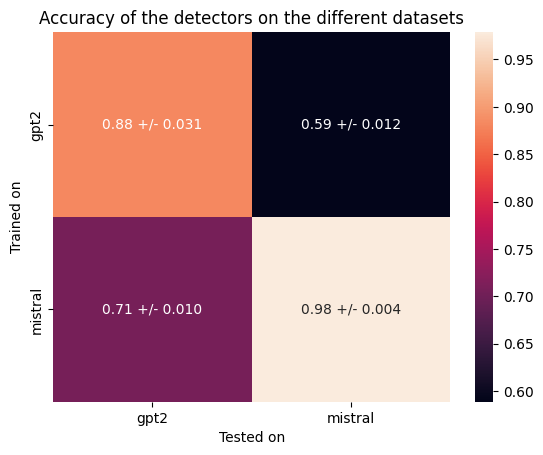

In [57]:
# Create the heatmap
heatmap = sns.heatmap(detector_results_df.pivot(index="detector", columns="dataset", values="accuracy"), annot=True)
nb_detectors = len(detector_results_df["detector"].unique())

# Set the text on the heatmap to add uncertainty
for i, detector in enumerate(detector_results_df["detector"].unique()):
    for j, dataset in enumerate(detector_results_df["dataset"].unique()):

        # get the correct postion
        pos = nb_detectors * i + j
        heatmap.texts[pos].set_text(f"{detector_results_df[(detector_results_df['detector'] == detector) & (detector_results_df['dataset'] == dataset)]['accuracy'].values[0]:.2f} +/- {detector_results_df[(detector_results_df['detector'] == detector) & (detector_results_df['dataset'] == dataset)]['std_accuracy'].values[0]:.3f}")

plt.xlabel("Tested on")
plt.ylabel("Trained on")

plt.title("Accuracy of the detectors on the different datasets")

plt.show()

# Test with actual data

In [ ]:
"""
# detector trained on gpt-2 samples
detector_gpt2_results_path = "./outputs_freeze_base/roberta/25_03_1611/test/"

# detector trained on mistral samples
detector_mistral_results_path = "./outputs_full_finetuning/roberta/25_03_1240/test/"
"""


training_method = "freeze_base"
trained_on_models = {"gpt2": "02_04_1404", "phi": "02_04_1407", "gemma": "02_04_1410", "mistral": "02_04_1413"}

dataset_gpt2 = "fake_true_dataset_gpt2_10k.json"
dataset_phi = "fake_true_dataset_phi_10k.json"
dataset_gemma = "fake_true_dataset_gemma_10k.json"
dataset_mistral = "fake_true_dataset_mistral_10k.json"

datasets = [dataset_gpt2, dataset_mistral, dataset_phi, dataset_gemma]

# create a dataframe and load it with the results
# dataframe has column "detector", "dataset", "accuracy"

detector_gpt2_results = []
detector_mistral_results = []

# gpt2 results
for dataset in datasets:
    with open(detector_gpt2_results_path + "test_metrics_" + dataset, "r") as f:
        detector_gpt2_results.append(json.load(f))

# mistral results
for dataset in datasets:
    with open(detector_mistral_results_path + "test_metrics_" + dataset, "r") as f:
        detector_mistral_results.append(json.load(f))

# create a dataframe
detector_results_df = pd.DataFrame(columns = ["detector", "dataset", "accuracy", "precision", "recall", "f1_score", "std_accuracy", "std_precision", "std_recall", "std_f1_score"])

# fill the dataframe
detector_results_df.loc[0] = ["gpt2", "gpt2", detector_gpt2_results[0]["accuracy"], detector_gpt2_results[0]["precision"], detector_gpt2_results[0]["recall"], detector_gpt2_results[0]["f1_score"], detector_gpt2_results[0]["std_accuracy"], detector_gpt2_results[0]["std_precision"], detector_gpt2_results[0]["std_recall"], detector_gpt2_results[0]["std_f1_score"]]
detector_results_df.loc[1] = ["gpt2", "mistral", detector_gpt2_results[1]["accuracy"], detector_gpt2_results[1]["precision"], detector_gpt2_results[1]["recall"], detector_gpt2_results[1]["f1_score"], detector_gpt2_results[1]["std_accuracy"], detector_gpt2_results[1]["std_precision"], detector_gpt2_results[1]["std_recall"], detector_gpt2_results[1]["std_f1_score"]]
detector_results_df.loc[2] = ["mistral", "gpt2", detector_mistral_results[0]["accuracy"], detector_mistral_results[0]["precision"], detector_mistral_results[0]["recall"], detector_mistral_results[0]["f1_score"], detector_mistral_results[0]["std_accuracy"], detector_mistral_results[0]["std_precision"], detector_mistral_results[0]["std_recall"], detector_mistral_results[0]["std_f1_score"]]
detector_results_df.loc[3] = ["mistral", "mistral", detector_mistral_results[1]["accuracy"], detector_mistral_results[1]["precision"], detector_mistral_results[1]["recall"], detector_mistral_results[1]["f1_score"], detector_mistral_results[1]["std_accuracy"], detector_mistral_results[1]["std_precision"], detector_mistral_results[1]["std_recall"], detector_mistral_results[1]["std_f1_score"]]
display(detector_results_df)

In [11]:
"""
# detector trained on gpt-2 samples
detector_gpt2_results_path = "./outputs_freeze_base/roberta/25_03_1611/test/"

# detector trained on mistral samples
detector_mistral_results_path = "./outputs_full_finetuning/roberta/25_03_1240/test/"
"""


training_method = "freeze_base"
#detectors =["distil_roberta-base"]
trained_on_models = {"distil_roberta-base": {"02_04_1404":"gpt2", "02_04_1407": "phi", "02_04_1410": "gemma", "02_04_1413": "mistral"}}

dataset_names = ["gpt2", "phi", "gemma", "mistral"]
dataset_gpt2 = "fake_true_dataset_gpt2_10k.json"
dataset_phi = "fake_true_dataset_phi_10k.json"
dataset_gemma = "fake_true_dataset_gemma_10k.json"
dataset_mistral = "fake_true_dataset_mistral_10k.json"

datasets = [dataset_gpt2, dataset_mistral, dataset_phi, dataset_gemma]

results = []
for detector in trained_on_models.keys():
    for model_code, base_model in trained_on_models[detector].items():
        for dataset in dataset_names:
            results_path = f"./saved_training_logs/{detector}/{training_method}/fake_true_dataset_{base_model}_10k/{model_code}/test/test_metrics_fake_true_dataset_{dataset}_10k.json"

            with open(results_path, "r") as f:
                result_dict = json.load(f)
                result_dict["detector"] = base_model
                result_dict["dataset"] = dataset
                results.append(result_dict)

# transform to pandas dataframe
results_df = pd.DataFrame(results)

display(results_df)

,accuracy,precision,recall,f1_score,fp_rate,std_accuracy,std_precision,std_recall,std_f1_score,std_fp_rate,detector,dataset
0,0.970945,0.993780,0.947836,0.970251,0.005933,0.003675,0.002592,0.006702,0.003783,0.002474,gpt2,gpt2
1,0.502455,0.756312,0.014967,0.029326,0.004898,0.011107,0.099641,0.003745,0.007235,0.002265,gpt2,phi
2,0.495260,0.135042,0.002057,0.004047,0.013182,0.011579,0.090103,0.001454,0.002855,0.003656,gpt2,gemma
3,0.514070,0.136170,0.002378,0.004669,0.013919,0.011674,0.092626,0.001642,0.003217,0.003999,gpt2,mistral
4,0.505874,0.517495,0.176148,0.262692,0.164306,0.010983,0.026791,0.011659,0.015357,0.011613,phi,gpt2
5,0.874637,0.842130,0.923761,0.881010,0.175023,0.007600,0.011185,0.008252,0.007648,0.012430,phi,phi
6,0.832591,0.842959,0.816755,0.829580,0.151638,0.008650,0.012045,0.012405,0.009599,0.011494,phi,gemma
7,0.717941,0.780839,0.572913,0.660777,0.148304,0.010264,0.016468,0.016379,0.014187,0.011218,phi,mistral
8,0.480203,0.246474,0.019216,0.035619,0.058680,0.011120,0.049004,0.004434,0.008065,0.007350,gemma,gpt2
9,0.836200,0.924427,0.734118,0.818276,0.060655,0.008194,0.009449,0.013757,0.009890,0.007660,gemma,phi


Text(0.5, 1.0, 'Accuracy of RoBERTa detectors on the different datasets')

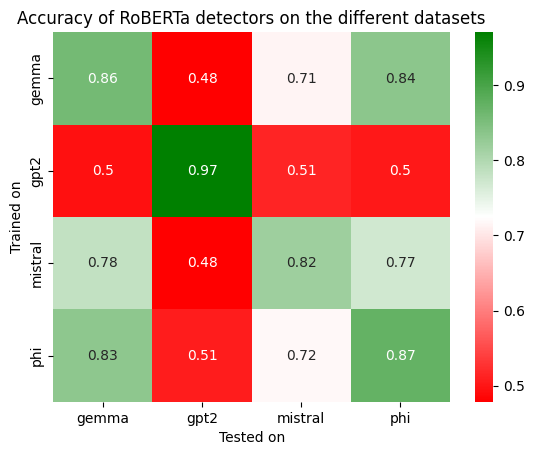

In [21]:
from  matplotlib.colors import LinearSegmentedColormap
cmap_g_r =LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

# 4x4 heatmap with the results where columns are the detectors trained on datasets and values are the accuracy
heatmap = sns.heatmap(results_df.pivot(index="detector", columns="dataset", values="accuracy"), annot=True, cmap=cmap_g_r)
#heatmap = sns.heatmap(results_df.pivot(index="detector", columns="dataset", values="accuracy"), annot=True)
nb_detectors = len(results_df["detector"].unique())
"""
# Set the text on the heatmap to add uncertainty
for i, detector in enumerate(results_df["detector"].unique()):
    for j, dataset in enumerate(results_df["dataset"].unique()):

        # get the correct postion
        pos = nb_detectors * i + j
        heatmap.texts[pos].set_text(f"{results_df[(results_df['detector'] == detector) & (results_df['dataset'] == dataset)]['accuracy'].values[0]:.2f} +/- {results_df[(results_df['detector'] == detector) & (results_df['dataset'] == dataset)]['std_accuracy'].values[0]:.2f}")
"""
plt.xlabel("Tested on")
plt.ylabel("Trained on")

plt.title("Accuracy of RoBERTa detectors on the different datasets")

Text(0.5, 1.0, 'FPR of RoBERTa detectors on the different datasets')

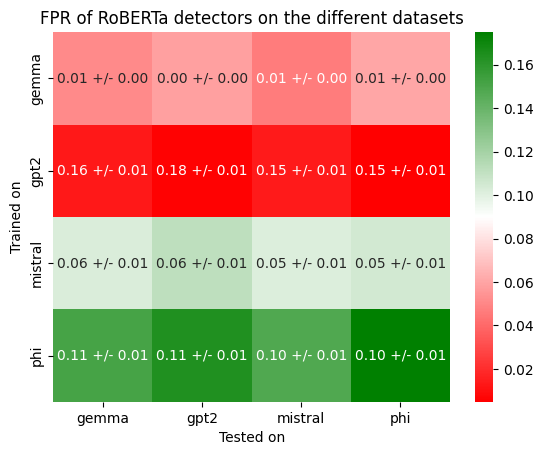

In [18]:
from  matplotlib.colors import LinearSegmentedColormap
cmap_g_r =LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

# 4x4 heatmap with the results where columns are the detectors trained on datasets and values are the accuracy
heatmap = sns.heatmap(results_df.pivot(index="detector", columns="dataset", values="fp_rate"), annot=True, cmap=cmap_g_r)

nb_detectors = len(results_df["detector"].unique())
# Set the text on the heatmap to add uncertainty
for i, detector in enumerate(results_df["detector"].unique()):
    for j, dataset in enumerate(results_df["dataset"].unique()):

        # get the correct postion
        pos = nb_detectors * i + j
        heatmap.texts[pos].set_text(f"{results_df[(results_df['detector'] == detector) & (results_df['dataset'] == dataset)]['fp_rate'].values[0]:.2f} +/- {results_df[(results_df['detector'] == detector) & (results_df['dataset'] == dataset)]['std_fp_rate'].values[0]:.2f}")
        
plt.xlabel("Tested on")
plt.ylabel("Trained on")

plt.title("FPR of RoBERTa detectors on the different datasets")